# Chloe deBeus
## Task 4.10: Python and Excel
### Import libraries

In [293]:
import gc
gc.collect()
#clears memory
import pandas as pd
import numpy as np
import os

In [294]:
mainPath = r'C:\Users\18286\Documents\Career Foundry\05_2023_Instacart Basket Analysis'
#make sure to use the pkl file call
customers_orders = pd.read_pickle(os.path.join(mainPath, '02 Datasets', 'Clean data', 'customers_orders_cleaned.pkl'))

In [295]:
customers_orders.shape

(12538942, 34)

In [296]:
np.random.seed(4)
#this created a variable that produced a random boolean at the rate of 70/30
dev = np.random.rand(len(customers_orders)) <= 0.7
big_sample = customers_orders[dev]
#store 30% in small sample
small_sample = customers_orders[~dev]
split_customers_orders = small_sample

In [297]:
split_customers_orders.shape

(3760300, 34)

In [298]:
#check the shape

#the split the set into 20,000
#split_customers_orders = customers_orders.sample(n=20000, random_state=42)

### Task - Part 1
#### Step One
Dataset imported into customers_orders
#### Step Two
There are great security implications around PII. We have direct information of first and last names. It is unclear how we should handle these as there has been no direction from senior leadership or the client.
#### Step Three

In [299]:
#let's look at the dataset really quickly to understand how to pull region
split_customers_orders.dtypes

user_id                       int8
first_name                  object
surname                     object
gender                      object
state                       object
age                           int8
date_joined                 object
dependents                    int8
fam_status                  object
income                       int32
order_id                     int32
order_number                  int8
orders_day_of_week            int8
order_time_of_day             int8
days_since_prior_order        int8
new_customer                 int32
product_id                   int32
add_to_cart_order            int32
reordered                    int32
_merge                    category
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float16
busiest_days                object
price_category              object
busiest_period_of_day       object
max_order_count               int8
loyalty_status      

In [300]:
#let's create our region variables first for the column designation
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [301]:
#so we want to use the state variable
split_customers_orders.loc[customers_orders['state'].isin(northeast), 'Region'] = 'Northeast'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2106628204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_customers_orders.loc[customers_orders['state'].isin(northeast), 'Region'] = 'Northeast'


In [302]:
split_customers_orders.loc[customers_orders['state'].isin(midwest), 'Region'] = 'Midwest'

In [303]:
split_customers_orders.loc[customers_orders['state'].isin(south), 'Region'] = 'South'

In [304]:
split_customers_orders.loc[customers_orders['state'].isin(west), 'Region'] = 'West'

In [305]:
split_customers_orders['new_customer'].value_counts(dropna = False)

0    3481591
1     278709
Name: new_customer, dtype: int64

### Step Four - Excluding low activity customers
I will create a subset of those who are low activity, remove them from the dataset, and export the subset.

In [306]:
#find low activity using max order count
split_customers_orders['max_order_count'].describe()

count    3.760300e+06
mean     2.578822e+01
std      2.323903e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.700000e+01
max      8.100000e+01
Name: max_order_count, dtype: float64

In [307]:
split_customers_orders.loc[customers_orders['max_order_count'] < 5, 'exclude_low_activity_customers'] = 'Low activity'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2001011518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_customers_orders.loc[customers_orders['max_order_count'] < 5, 'exclude_low_activity_customers'] = 'Low activity'


In [308]:
split_customers_orders.loc[customers_orders['max_order_count'] >= 5, 'exclude_low_activity_customers'] = 'Normal activity'

In [309]:
split_customers_orders['exclude_low_activity_customers'].value_counts(dropna = False)

Normal activity    3602181
Low activity        158119
Name: exclude_low_activity_customers, dtype: int64

In [310]:
low_activity_subset = split_customers_orders['exclude_low_activity_customers'] == 'Low activity'

In [311]:
low_activity_subset

0           False
2           False
3           False
6           False
10          False
            ...  
12538919    False
12538924    False
12538929    False
12538935    False
12538937    False
Name: exclude_low_activity_customers, Length: 3760300, dtype: bool

In [312]:
#export sample
low_activity_subset.to_pickle(os.path.join(mainPath, '02 Datasets','Clean Data', 'sample low activity customers_excluded from sample data.pkl'))

In [313]:
#i don't need to use the drop method here, I can use the subset method
active_customers_orders = split_customers_orders[~low_activity_subset]

In [314]:
active_customers_orders.shape

(3602181, 36)

In [315]:
active_customers_orders.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependents,fam_status,income,...,busiest_period_of_day,max_order_count,loyalty_status,spending_mean,spending_status,order_frequency_median,frequency_status,big_merge,Region,exclude_low_activity_customers
0,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both,Midwest,Normal activity
2,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both,Midwest,Normal activity
3,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both,Midwest,Normal activity
6,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both,Midwest,Normal activity
10,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both,Midwest,Normal activity


In [316]:
active_customers_orders.shape

(3602181, 36)

### Step Five - customer profiling
I will explore which profiles I want to create then create them

In [317]:
active_customers_orders.dtypes

user_id                               int8
first_name                          object
surname                             object
gender                              object
state                               object
age                                   int8
date_joined                         object
dependents                            int8
fam_status                          object
income                               int32
order_id                             int32
order_number                          int8
orders_day_of_week                    int8
order_time_of_day                     int8
days_since_prior_order                int8
new_customer                         int32
product_id                           int32
add_to_cart_order                    int32
reordered                            int32
_merge                            category
product_name                        object
aisle_id                              int8
department_id                         int8
prices     

I am interested in income, so let's take a look at how it changes by age

In [318]:
age_and_income_customer = active_customers_orders.groupby('age').agg({'income': ['median']})

In [319]:
age_and_income_customer

,income
,median
age,
18,68368.0
19,65362.0
20,65948.0
21,66617.0
22,67691.0
...,...
77,112450.0
78,114404.0


We can see the median income grouped by age.

What happens if we take the above and add in the idea of dependents or not?

To start, let's make a variable based on whether a customer has a dependent or not.

In [320]:
#let's make some variables - start with dependent profile
active_customers_orders.loc[active_customers_orders['dependents'] > 0, 'dependent_status'] = 'Has one or more'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\1647123332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[active_customers_orders['dependents'] > 0, 'dependent_status'] = 'Has one or more'


In [321]:
active_customers_orders.loc[active_customers_orders['dependents'] == 0, 'dependent_status'] = 'No dependents'

In [322]:
active_customers_orders['dependent_status'].value_counts(dropna = False)

Has one or more    2704466
No dependents       897715
Name: dependent_status, dtype: int64

Now, let's recheck the status of the group by

In [323]:
active_customers_orders.groupby(['age', 'dependent_status']).agg({'income': 'median'})

income
age dependent_status          
18  Has one or more    68233.0
    No dependents      68978.0
19  Has one or more    66469.0
    No dependents      62200.0
20  Has one or more    65277.0
...                        ...
79  No dependents     110836.0
80  Has one or more   113883.0
    No dependents     107956.0
81  Has one or more   111487.0
    No dependents     109415.0

[128 rows x 1 columns]

Since the age list is so long, let's decompress the ages into groups.

In [324]:
age_result_2 = []
for value in active_customers_orders['age']:
    if (value >= 18) and (value <26):
        age_result_2.append('18 - 25')
    elif (value >= 26) and (value <35):
        age_result_2.append('26 - 34')
    elif (value >= 35) and (value <45):
        age_result_2.append('35 - 44')
    elif (value >= 45) and (value <55):
        age_result_2.append('45 - 54')
    elif (value >= 55) and (value <65):
        age_result_2.append('55 - 64')
    else:
        age_result_2.append('65+')

In [325]:
active_customers_orders['age_groups'] = age_result_2
active_customers_orders['age_groups'].value_counts(dropna = False)

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\222419008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders['age_groups'] = age_result_2


65+        958718
55 - 64    564834
35 - 44    562832
45 - 54    561490
26 - 34    508832
18 - 25    445475
Name: age_groups, dtype: int64

Let's try grouping again to see where we're at

In [326]:
active_customers_orders.groupby(['age_groups', 'dependent_status']).agg({'income': 'median'})

income
age_groups dependent_status          
18 - 25    Has one or more    67019.0
           No dependents      66049.0
26 - 34    Has one or more    67449.0
           No dependents      65399.0
35 - 44    Has one or more    77149.0
           No dependents      76064.0
45 - 54    Has one or more   112787.0
           No dependents     112872.0
55 - 64    Has one or more   112499.0
           No dependents     112788.0
65+        Has one or more   113098.0
           No dependents     111733.0

The median income clearly changes at age 45 regardless of dependent status
Additionally, dependent status does not change median income very much. Let's make a variable for these age groups.

Since 65+ has the highest median income amount, let's create a 'high income retired' customer profile.

In [327]:
age_income_result = []
for value in active_customers_orders['age']:
    if (value >= 18) and (value <45):
        age_income_result.append('18 - 44')
    elif (value >= 45):
        age_income_result.append('45+')

In [328]:
active_customers_orders['age_profile'] = age_income_result
active_customers_orders['age_profile'].value_counts(dropna = False)

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2072110017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders['age_profile'] = age_income_result


45+        2085042
18 - 44    1517139
Name: age_profile, dtype: int64

In [329]:
#now let's try grouping again
median_income_by_age = active_customers_orders.groupby(['age_groups']).agg({'income': 'median'})
median_income_by_age

,income
age_groups,
18 - 25,66738.0
26 - 34,66937.0
35 - 44,76892.0
45 - 54,112801.0
55 - 64,112576.0
65+,112776.0


Let's make income groups based on the income not something that will be 50/50 down the middle.

In [330]:
income_result_2 = []
for value in active_customers_orders['income']:
    if (value >= 25000) and (value < 50000):
        income_result_2.append('25,000-49,999')
    elif (value >= 50000) and (value < 75000):
        income_result_2.append('50,000-74,999')
    elif (value >= 75000) and (value < 100000):
        income_result_2.append('75,000-99,999')
    else:
        income_result_2.append('100,000 or more')

In [331]:
active_customers_orders['income_groups'] = income_result_2
active_customers_orders['income_groups'].value_counts(dropna = False)

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\1511123004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders['income_groups'] = income_result_2


100,000 or more    1524538
50,000-74,999       751660
75,000-99,999       731449
25,000-49,999       594534
Name: income_groups, dtype: int64

Getting to actually create the high income retiree variable... Since there is a higher income with older folks

Let's make the high income 100,000 or more. Creating the high income retiree variable

In [332]:
active_customers_orders.loc[(active_customers_orders['age_groups'] == '65+') & (active_customers_orders['income_groups'] == '100,000 or more'), 'is_retiree_high_income'] = 'True'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2010382586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[(active_customers_orders['age_groups'] == '65+') & (active_customers_orders['income_groups'] == '100,000 or more'), 'is_retiree_high_income'] = 'True'


In [333]:
active_customers_orders.loc[~((active_customers_orders['age_groups'] == '65+') & (active_customers_orders['income_groups'] == '100,000 or more')), 'is_retiree_high_income'] = 'False'

In [334]:
active_customers_orders['is_retiree_high_income'].value_counts(dropna = False)

False    2982938
True      619243
Name: is_retiree_high_income, dtype: int64

We have considered older folks, and since they typically have high income, we looked into those within this variable.

Now let's move forward and look at a different age group that represents the younger group that has lower income.

Let's also look at the youngest group by dependent status to see if that changes anything.

In [335]:
#let's create a young, lower than median income group
#let's see how they compare with dependents`
active_customers_orders[active_customers_orders['age_groups'] == '18 - 25'].groupby(['dependent_status', 'income_groups']).size()

dependent_status  income_groups  
Has one or more   100,000 or more      9407
                  25,000-49,999       76905
                  50,000-74,999      138549
                  75,000-99,999      108365
No dependents     100,000 or more      3204
                  25,000-49,999       24817
                  50,000-74,999       49677
                  75,000-99,999       34551
dtype: int64

Let's create a young parent.

In [336]:
active_customers_orders.loc[(active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['dependent_status'] == 'Has one or more'), 'is_young_parent'] = 'True'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\3317740757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[(active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['dependent_status'] == 'Has one or more'), 'is_young_parent'] = 'True'


In [337]:
active_customers_orders.loc[~((active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['dependent_status'] == 'Has one or more')), 'is_young_parent'] = 'False'

In [338]:
active_customers_orders['is_young_parent'].value_counts(dropna = False)

False    3268955
True      333226
Name: is_young_parent, dtype: int64

In [339]:
active_customers_orders.loc[(active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['income_groups'] == '25,000-49,999'), 'is_young_low_income'] = 'True'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\3926886602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[(active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['income_groups'] == '25,000-49,999'), 'is_young_low_income'] = 'True'


In [340]:
active_customers_orders.loc[~((active_customers_orders['age_groups'] == '18 - 25') & (active_customers_orders['income_groups'] == '25,000-49,999')), 'is_young_low_income'] = 'False'

In [341]:
active_customers_orders['is_young_low_income'].value_counts(dropna = False)

False    3500459
True      101722
Name: is_young_low_income, dtype: int64

Lastly, let's make a group for everyone else in the middle who is not a low income young person and not a high income older person.

In [342]:
active_customers_orders.dtypes

user_id                               int8
first_name                          object
surname                             object
gender                              object
state                               object
age                                   int8
date_joined                         object
dependents                            int8
fam_status                          object
income                               int32
order_id                             int32
order_number                          int8
orders_day_of_week                    int8
order_time_of_day                     int8
days_since_prior_order                int8
new_customer                         int32
product_id                           int32
add_to_cart_order                    int32
reordered                            int32
_merge                            category
product_name                        object
aisle_id                              int8
department_id                         int8
prices     

In [343]:
active_customers_orders.loc[(active_customers_orders['is_young_low_income'] == 'False') & (active_customers_orders['is_retiree_high_income'] == 'False'), 'average_adult'] = 'True'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2033095466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[(active_customers_orders['is_young_low_income'] == 'False') & (active_customers_orders['is_retiree_high_income'] == 'False'), 'average_adult'] = 'True'


In [344]:
active_customers_orders.loc[~((active_customers_orders['is_young_low_income'] == 'False') & (active_customers_orders['is_retiree_high_income'] == 'False')), 'average_adult'] = 'False'

In [345]:
active_customers_orders['average_adult'].value_counts(dropna = False)

True     2881216
False     720965
Name: average_adult, dtype: int64

Okay! we created a lot of variables out of curiosity, but let's use these final three
is_retiree_high_income

is_young_low_income

average_adult

In [346]:
active_customers_orders.loc[active_customers_orders['is_retiree_high_income'] == 'True', 'profile_grouping'] = 'Retiree with high income'

C:\Users\18286\AppData\Local\Temp\ipykernel_22208\2893387669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers_orders.loc[active_customers_orders['is_retiree_high_income'] == 'True', 'profile_grouping'] = 'Retiree with high income'


In [347]:
active_customers_orders.loc[active_customers_orders['is_young_low_income'] == 'True', 'profile_grouping'] = 'Young with low income'

In [348]:
active_customers_orders.loc[active_customers_orders['average_adult'] == 'True', 'profile_grouping'] = 'Average adult'

### Task - Part One, Step 6 - visualize distribution of profiles

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

1 - The profiles I made

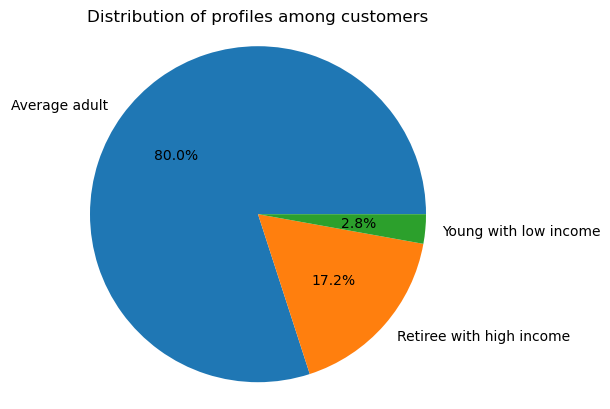

In [350]:
profile_counts = active_customers_orders['profile_grouping'].value_counts()
profile_pie = profile_counts.plot(kind='pie', labels=profile_counts.index, autopct='%1.1f%%', legend = False)
plt.axis('equal')
profile_pie.set_title('Distribution of profiles among customers')
profile_pie.set_ylabel('')
plt.show()

In [351]:
#exporting into a saved file
profile_pie.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'profile_pie.png'))

# Age profile

Text(0, 0.5, '')

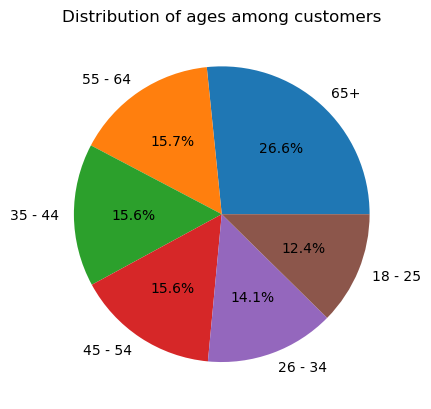

In [352]:
#age
age_counts = active_customers_orders['age_groups'].value_counts()
age_pie = age_counts.plot(kind='pie', labels=age_counts.index, autopct='%1.1f%%', legend = False)
age_pie.set_title('Distribution of ages among customers')
age_pie.set_ylabel('')

In [353]:
#exporting into a saved file
age_pie.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'age_pie.png'))

Text(0, 0.5, ' ')

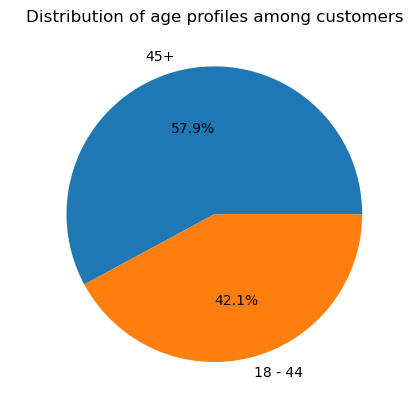

In [354]:
#age
age_profile_counts = active_customers_orders['age_profile'].value_counts()
age_profile_pie = age_profile_counts.plot(kind='pie', labels=age_profile_counts.index, autopct='%1.1f%%', legend = False)
age_profile_pie.set_title('Distribution of age profiles among customers')
age_profile_pie.set_ylabel(' ')

In [355]:
#exporting into a saved file
age_profile_pie.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'age_profile_pie.png'))

Text(0.5, 1.0, 'Frequency of income by age group')

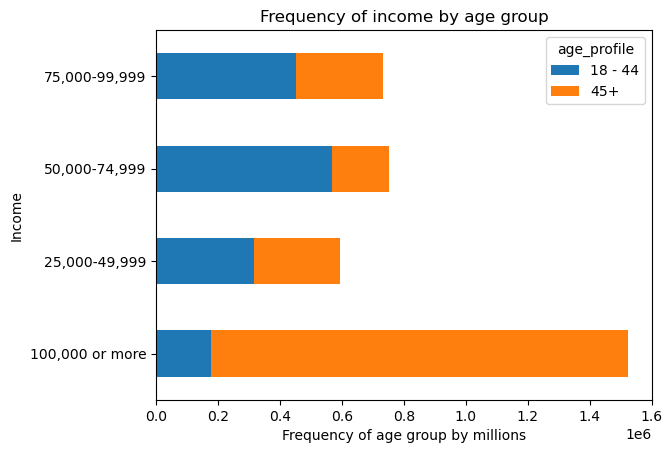

In [356]:
age_by_income_counts = active_customers_orders.groupby(['income_groups','age_profile']).size().unstack()
age_income_bar = age_by_income_counts.plot.barh(stacked=True)
plt.xlabel('Frequency of age group by millions')
plt.ylabel('Income')
plt.title('Frequency of income by age group')

In [357]:
#exporting into a saved file
age_income_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'age_income_bar.png'), dpi = 300, bbox_inches = 'tight')

# Income profile

In [358]:
active_customers_orders['income_groups'].value_counts()

100,000 or more    1524538
50,000-74,999       751660
75,000-99,999       731449
25,000-49,999       594534
Name: income_groups, dtype: int64

Text(0, 0.5, '')

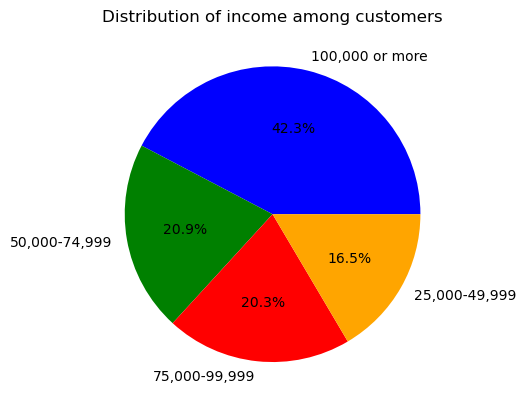

In [359]:
#income
income_counts = active_customers_orders['income_groups'].value_counts()
colors = ['blue', 'green', 'red', 'orange']
income_pie = income_counts.plot(kind='pie', labels=income_counts.index, autopct='%1.1f%%', legend = False, colors=colors)
income_pie.set_title('Distribution of income among customers')
income_pie.set_ylabel('')

In [360]:
#exporting into a saved file
income_pie.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'income_pie.png'))

# Dependents

Text(0, 0.5, '')

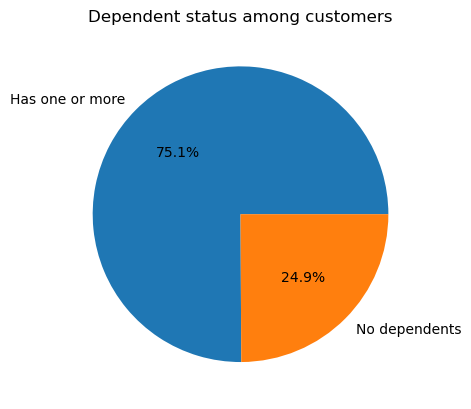

In [361]:
#dependents
dependents_counts = active_customers_orders['dependent_status'].value_counts()
dependents_pie = dependents_counts.plot(kind='pie', labels=dependents_counts.index, autopct='%1.1f%%', legend = False)
dependents_pie.set_title('Dependent status among customers')
dependents_pie.set_ylabel('')

Text(0, 0.5, '')

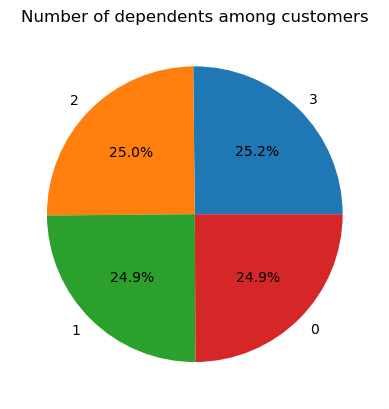

In [362]:
#dependents
dependents_number_counts = active_customers_orders['dependents'].value_counts()
dependents_number_pie = dependents_number_counts.plot(kind='pie', labels=dependents_number_counts.index, autopct='%1.1f%%', legend = False)
dependents_number_pie.set_title('Number of dependents among customers')
dependents_number_pie.set_ylabel('')

In [363]:
#exporting into a saved file
dependents_number_pie.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'dependents_by number pie.png'))

### Task - Part One, Task 7 - aggregate for usage frequency and expenditure

In [364]:
active_customers_orders.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'dependents', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_days', 'price_category',
       'busiest_period_of_day', 'max_order_count', 'loyalty_status',
       'spending_mean', 'spending_status', 'order_frequency_median',
       'frequency_status', 'big_merge', 'Region',
       'exclude_low_activity_customers', 'dependent_status', 'age_groups',
       'age_profile', 'income_groups', 'is_retiree_high_income',
       'is_young_parent', 'is_young_low_income', 'average_adult',
       'profile_grouping'],
      dtype='object')

In [365]:
profile_stats=active_customers_orders.groupby(['profile_grouping']).agg({'order_number':['min','max','mean'],'prices':['min','max','mean', 'sum']})
profile_stats

order_number                prices                  \
                                  min max       mean    min   max      mean   
profile_grouping                                                              
Average adult                       1  81  13.852414    1.0  25.0  7.628440   
Retiree with high income            1  81  13.795513    1.0  25.0  7.636873   
Young with low income               1  81  13.494731    1.0  25.0  7.641455   

                                        
                                   sum  
profile_grouping                        
Average adult             2.197615e+07  
Retiree with high income  4.728416e+06  
Young with low income     7.772506e+05

In [366]:
#age
age_stats=active_customers_orders.groupby(['age_groups']).agg({'max_order_count':['min','max','mean'], 'order_frequency_median':['min','max','mean'],'prices':['min','max','mean', 'sum']})
age_stats

max_order_count                order_frequency_median        \
                       min max       mean                    min   max   
age_groups                                                               
18 - 25                  5  81  26.600476                    3.0  30.0   
26 - 34                  5  81  26.884479                    3.0  30.0   
35 - 44                  5  81  26.585313                    3.0  30.0   
45 - 54                  5  81  26.512538                    3.0  30.0   
55 - 64                  5  81  26.895869                    3.0  30.0   
65+                      5  81  26.974797                    3.0  30.0   

                      prices                              
                 mean    min   max      mean         sum  
age_groups                                                
18 - 25     11.789438    1.0  25.0  7.641294  3403676.75  
26 - 34     11.716394    1.0  25.0  7.632147  3882885.50  
35 - 44     11.694170    1.0  25.0  7.621982  4289247.50  
45 - 54     11.819531    1.0  25.0  7.611589  4273222.50  
55 - 64     11.706790    1.0  25.0  7.624426  4305963.50  
65+         11.676934    1.0  25.0  7.643352  7326825.00

In [367]:
#age
age_profile_stats=active_customers_orders.groupby(['age_profile']).agg({'max_order_count':['min','max','mean', 'sum'], 'order_number':['min','max','mean', 'sum'], 'prices':['min','max','mean', 'sum']})
age_profile_stats

max_order_count                          order_number      \
                        min max       mean       sum          min max   
age_profile                                                             
18 - 44                   5  81  26.690102  40492595            1  81   
45+                       5  81  26.828932  55939449            1  81   

                                 prices                              
                  mean       sum    min   max      mean         sum  
age_profile                                                          
18 - 44      13.766736  20886052    1.0  25.0  7.631062  11575810.0  
45+          13.880407  28941232    1.0  25.0  7.629672  15906011.0

In [368]:
age_profile_stats.to_clipboard()

In [369]:
#age
age_income_stats=active_customers_orders.groupby(['age_profile', 'income_groups']).agg({'max_order_count':['min','max','mean'],'order_number':['min','max','mean', 'sum'],'prices':['min','max','mean', 'sum']})
age_income_stats

max_order_count                order_number      \
                                        min max       mean          min max   
age_profile income_groups                                                     
18 - 44     100,000 or more               5  81  26.250565            1  81   
            25,000-49,999                 5  81  26.933660            1  81   
            50,000-74,999                 5  81  26.800538            1  81   
            75,000-99,999                 5  81  26.553006            1  81   
45+         100,000 or more               5  81  26.782298            1  81   
            25,000-49,999                 5  81  26.650440            1  81   
            50,000-74,999                 5  81  27.871036            1  81   
            75,000-99,999                 5  81  26.547735            1  81   

                                                 prices                  \
                                  mean       sum    min   max      mean   
age_profile income_groups                                                 
18 - 44     100,000 or more  13.549341   2402664    1.0  25.0  7.639457   
            25,000-49,999    13.859956   4398471    1.0  25.0  7.616400   
            50,000-74,999    13.812941   7858334    1.0  25.0  7.635974   
            75,000-99,999    13.728548   6226583    1.0  25.0  7.631878   
45+         100,000 or more  13.865222  18679380    1.0  25.0  7.627002   
            25,000-49,999    13.867817   3843923    1.0  25.0  7.613903   
            50,000-74,999    14.416210   2634548    1.0  25.0  7.653409   
            75,000-99,999    13.614230   3783381    1.0  25.0  7.642729   

                                          
                                     sum  
age_profile income_groups                 
18 - 44     100,000 or more   1354514.00  
            25,000-49,999     2416775.00  
            50,000-74,999     4343517.50  
            75,000-99,999     3461003.25  
45+         100,000 or more  10273686.00  
            25,000-49,999     2110216.00  
            50,000-74,999     1398492.25  
            75,000-99,999     2123616.25

In [370]:
#age
age_region_stats=active_customers_orders.groupby(['age_profile', 'Region']).agg({'max_order_count':['min','max','mean'], 'order_number':['min','max','mean', 'sum'],'prices':['min','max','mean', 'sum']})
age_region_stats

max_order_count                order_number      \
                                  min max       mean          min max   
age_profile Region                                                      
18 - 44     Midwest                 5  81  27.168744            1  81   
            Northeast               5  81  26.769297            1  81   
            South                   5  81  26.844947            1  81   
            West                    5  81  25.972616            1  81   
45+         Midwest                 5  81  26.516495            1  81   
            Northeast               5  81  26.741513            1  81   
            South                   5  81  26.714035            1  81   
            West                    5  81  27.318939            1  81   

                                          prices                               
                            mean      sum    min   max      mean          sum  
age_profile Region                                                             
18 - 44     Midwest    13.953669  4940492    1.0  25.0  7.598216  2689943.250  
            Northeast  13.793004  3778414    1.0  25.0  7.632680  2090560.625  
            South      13.882580  7110213    1.0  25.0  7.637501  3911156.750  
            West       13.414683  5056933    1.0  25.0  7.651989  2884149.250  
45+         Midwest    13.770284  6796434    1.0  25.0  7.656033  3778160.500  
            Northeast  13.851294  5009653    1.0  25.0  7.631811  2759838.500  
            South      13.800187  9508660    1.0  25.0  7.618603  5248714.500  
            West       14.102593  7626485    1.0  25.0  7.618284  4119297.750

In [371]:
#region
region_stats=active_customers_orders.groupby(['Region']).agg({'max_order_count':['min','max','mean'], 'order_number':['min','max','mean', 'sum'], 'prices':['min','max','mean', 'sum']})
region_stats

max_order_count                order_number                 \
                      min max       mean          min max       mean   
Region                                                                 
Midwest                 5  81  26.788948            1  81  13.846887   
Northeast               5  81  26.753488            1  81  13.826172   
South                   5  81  26.769854            1  81  13.835318   
West                    5  81  26.765935            1  81  13.820033   

                    prices                             
                sum    min   max      mean        sum  
Region                                                 
Midwest    11736926    1.0  25.0  7.631881  6468103.5  
Northeast   8788067    1.0  25.0  7.632185  4850399.0  
South      16618873    1.0  25.0  7.626660  9159871.0  
West       12683418    1.0  25.0  7.632128  7003447.0

In [372]:
#income
income_stats=active_customers_orders.groupby(['income_groups']).agg({'max_order_count':['min','max','mean'], 'order_number':['min','max','mean', 'sum'], 'prices':['min','max','mean', 'sum']})
income_stats

max_order_count                order_number                 \
                            min max       mean          min max       mean   
income_groups                                                                
100,000 or more               5  81  26.720450            1  81  13.828480   
25,000-49,999                 5  81  26.801618            1  81  13.863621   
50,000-74,999                 5  81  27.060805            1  81  13.959612   
75,000-99,999                 5  81  26.551004            1  81  13.685115   

                          prices                              
                      sum    min   max      mean         sum  
income_groups                                                 
100,000 or more  21082044    1.0  25.0  7.628451  11628201.0  
25,000-49,999     8242394    1.0  25.0  7.615235   4526991.0  
50,000-74,999    10492882    1.0  25.0  7.640213   5742009.5  
75,000-99,999    10009964    1.0  25.0  7.636001   5584619.5

In [ ]:
income_dept_stats.to_clipboard()

### Task - Part One, Step 8 - compare profiles with regions and departments
Take each step from above and divide them into region and departments

Let's start with departments

In [374]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(mainPath,'02 Datasets','Clean Data','departments_wrangled.csv'))

In [375]:
df_dep.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [376]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [377]:
active_customers_orders.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'dependents', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_days', 'price_category',
       'busiest_period_of_day', 'max_order_count', 'loyalty_status',
       'spending_mean', 'spending_status', 'order_frequency_median',
       'frequency_status', 'big_merge', 'Region',
       'exclude_low_activity_customers', 'dependent_status', 'age_groups',
       'age_profile', 'income_groups', 'is_retiree_high_income',
       'is_young_parent', 'is_young_low_income', 'average_adult',
       'profile_grouping'],
      dtype='object')

In [378]:
#merging department data frame with df datadrame
active_customers_orders=active_customers_orders.merge(df_dep,on='department_id')

In [379]:
active_customers_orders.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'dependents', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_days', 'price_category',
       'busiest_period_of_day', 'max_order_count', 'loyalty_status',
       'spending_mean', 'spending_status', 'order_frequency_median',
       'frequency_status', 'big_merge', 'Region',
       'exclude_low_activity_customers', 'dependent_status', 'age_groups',
       'age_profile', 'income_groups', 'is_retiree_high_income',
       'is_young_parent', 'is_young_low_income', 'average_adult',
       'profile_grouping', 'department'],
      dtype='object')

Let's add in the table for department since we have the names now!

In [380]:
#income with department
income_dept_stats=active_customers_orders.groupby(['income_groups', 'department']).agg({'max_order_count':['min','max','mean', 'sum'], 'order_number':['min','max','mean', 'sum'], 'prices':['min','max','mean', 'sum']})
income_dept_stats

max_order_count                          \
                                          min max       mean      sum   
income_groups   department                                              
100,000 or more alcohol                     5  40  29.139798   355185   
                babies                      5  67  18.457084    97841   
                bakery                      5  81  21.278982  1146852   
                beverages                   5  81  39.567231  6424650   
                breakfast                   5  81  39.541056  1540480   
...                                       ...  ..        ...      ...   
75,000-99,999   pantry                      5  81  25.482274  1211886   
                personal care               5  81  22.174203   189279   
                pets                        5  24   9.690364    16493   
                produce                     5  81  23.545636  4403034   
                snacks                      5  81  33.897026  2864536   

                              order_number                            prices  \
                                       min max       mean      sum       min   
income_groups   department                                                     
100,000 or more alcohol                  1  37  11.318566   137962  1.200195   
                babies                   1  54  10.571779    56041  1.799805   
                bakery                   1  71  10.532192   567643  1.099609   
                beverages                1  81  19.448517  3157914  1.000000   
                breakfast                1  71  22.411818   873142  1.000000   
...                                    ...  ..        ...      ...       ...   
75,000-99,999   pantry                   1  79  12.666239   602381  1.000000   
                personal care            1  69  10.416940    88919  1.000000   
                pets                     1  21   4.708578     8014  2.699219   
                produce                  1  81  13.077091  2445416  1.000000   
                snacks                   1  80  15.905392  1344117  1.599609   

                                                                  
                                     max      mean           sum  
income_groups   department                                        
100,000 or more alcohol        15.000000  8.749872  1.066522e+05  
                babies         13.601562  7.012634  3.717397e+04  
                bakery         14.898438  7.489216  4.036388e+05  
                beverages      14.898438  7.911930  1.284684e+06  
                breakfast      14.796875  7.223151  2.814068e+05  
...                                  ...       ...           ...  
75,000-99,999   pantry         14.898438  8.284257  3.939827e+05  
                personal care  14.898438  7.534176  6.431173e+04  
                pets           13.796875  7.184861  1.222863e+04  
                produce        15.000000  7.934224  1.483700e+06  
                snacks          7.000000  4.075579  3.444149e+05  

[84 rows x 12 columns]

Let's move forward with department visualizations

Text(0.5, 1.0, 'Frequency of purchases of products by department')

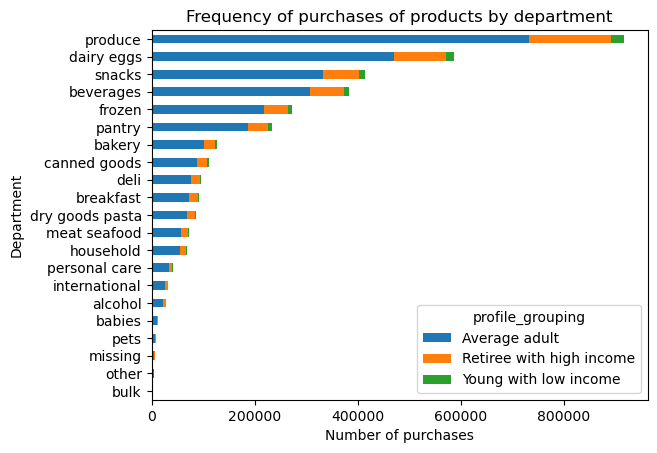

In [381]:
department_counts_profile = active_customers_orders.groupby(['department','profile_grouping']).size().unstack()

count = department_counts_profile.sum(axis=1)
data_sorted = department_counts_profile.loc[count.sort_values(ascending=True).index]

departments_profile_bar = data_sorted.plot.barh(stacked=True)
plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Frequency of purchases of products by department')

In [382]:
#exporting into a saved file
departments_profile_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments_profile_bar.png'), dpi = 300, bbox_inches = 'tight')

## Departments by income

Text(0.5, 1.0, 'Department purchases grouped by income')

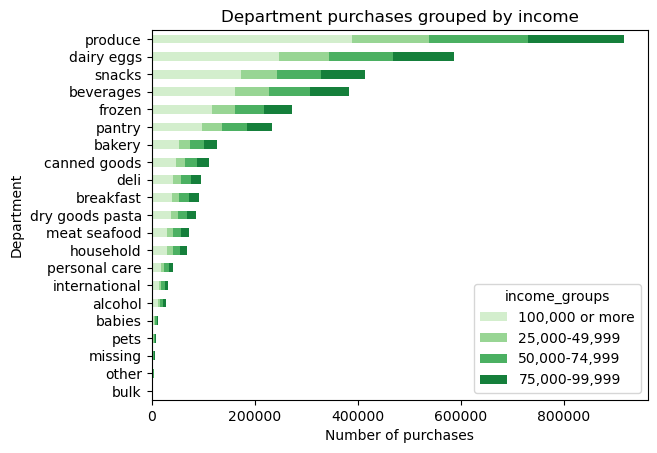

In [383]:
department_income_counts = active_customers_orders.groupby(['department','income_groups']).size().unstack()

count = department_income_counts.sum(axis=1)
data_sorted = department_income_counts.loc[count.sort_values(ascending=True).index]

#freshness_bar = data_sorted.plot.bar(stacked = True)

departments_income_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Greens',4))
plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Department purchases grouped by income')

In [384]:
#exporting into a saved file
departments_income_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments_income_bar.png'), dpi = 300, bbox_inches = 'tight')

I want to take a look at income based on the top departments because I think income is a big factor in buying fresh food or not.

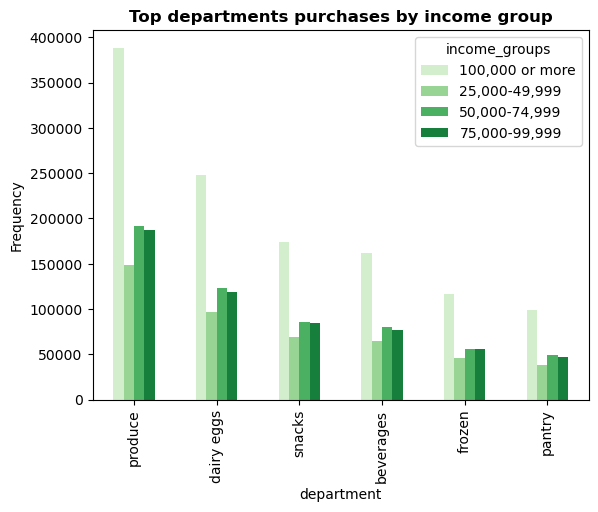

In [385]:
# create a bar chart between age and region
#keep this handy for other charts!
fresh_depts = active_customers_orders[active_customers_orders['department'].isin(['dairy eggs', 'produce', 'snacks', 'beverages', 'frozen', 'pantry'])]
top_depts_income = pd.crosstab(fresh_depts['department'], fresh_depts['income_groups'])

count = top_depts_income.sum(axis=1)

data_sorted = top_depts_income.loc[count.sort_values(ascending=False).index]

depts_income_top_bar = data_sorted.plot.bar(color=sns.color_palette('Greens',4))

plt.title('Top departments purchases by income group',fontweight='bold')
plt.ylabel('Frequency')
plt.show()

I have an inkling that people with low income spend less on fresh items than their counterparts

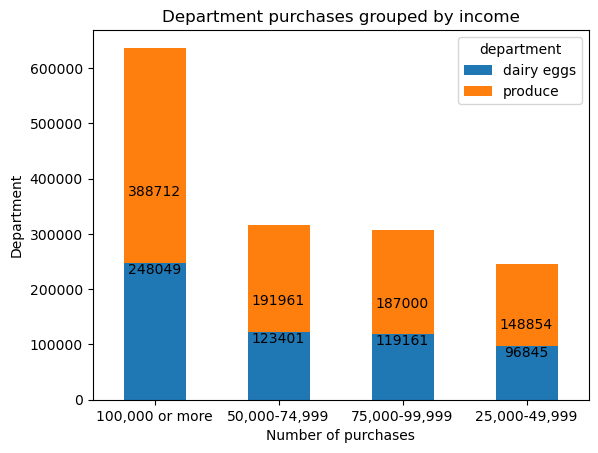

In [386]:
fresh_depts = active_customers_orders[active_customers_orders['department'].isin(['dairy eggs', 'produce'])]
fresh_depts_income = pd.crosstab(fresh_depts['income_groups'], fresh_depts['department'])

#sort by frequency, need the total count to do that since it doesn't exist within the column itself
count = fresh_depts_income.sum(axis=1)
data_sorted = fresh_depts_income.loc[count.sort_values(ascending=False).index]

freshness_bar = data_sorted.plot.bar(stacked = True)

plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Department purchases grouped by income')
plt.xticks(rotation = 'horizontal')
#labels
for container in freshness_bar.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='top')

In [387]:
#exporting into a saved file
freshness_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'income groups purchase fresh departments.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency status by income group')

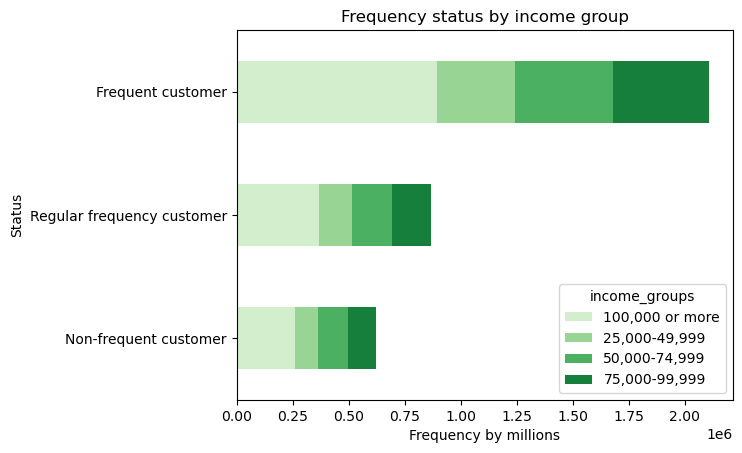

In [478]:
income_frequency_counts = active_customers_orders.groupby(['frequency_status', 'income_groups']).size().unstack()

count = income_frequency_counts.sum(axis=1)
data_sorted = income_frequency_counts.loc[count.sort_values(ascending=True).index]

income_frequency_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Greens',4))
plt.xlabel('Frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Status')
plt.title('Frequency status by income group')

In [479]:
#exporting into a saved file
income_frequency_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'income groups frequency status.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price group by income group')

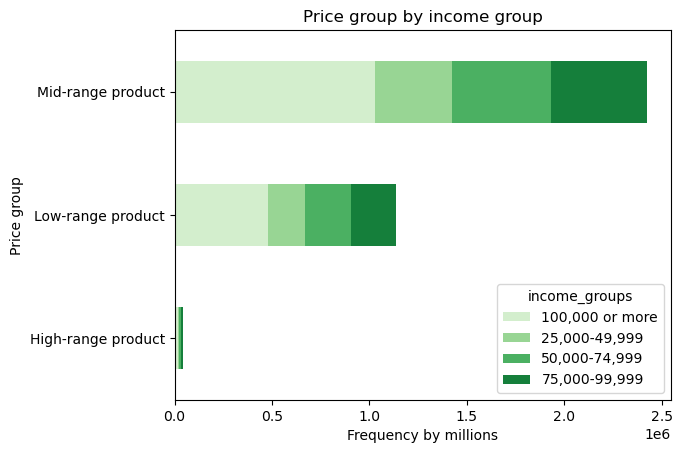

In [480]:
income_price_counts = active_customers_orders.groupby(['price_category', 'income_groups']).size().unstack()

count = income_price_counts.sum(axis=1)
data_sorted = income_price_counts.loc[count.sort_values(ascending=True).index]

income_price_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Greens',4))
plt.xlabel('Frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Price group')
plt.title('Price group by income group')

In [481]:
#exporting into a saved file
income_price_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'income groups price category purchases.png'), dpi = 300, bbox_inches = 'tight')

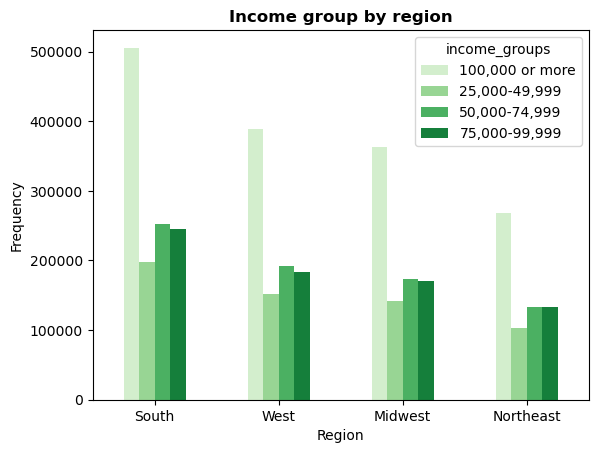

In [388]:
# create a bar chart between age and region
#keep this handy for other charts!
income_region_tab=pd.crosstab(active_customers_orders['Region'],active_customers_orders['income_groups'],dropna=False)
count = income_region_tab.sum(axis=1)

data_sorted = income_region_tab.loc[count.sort_values(ascending=False).index]

region_income_bar =data_sorted.plot.bar(color=sns.color_palette('Greens',4))

plt.title('Income group by region',fontweight='bold')
plt.ylabel('Frequency')
plt.xticks(rotation = 'horizontal')
plt.show()

In [389]:
#exporting into a saved file
region_income_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'income groups by region.png'), dpi = 300, bbox_inches = 'tight')

In [390]:
active_customers_orders['department'].value_counts(dropna = False)

produce            916527
dairy eggs         587456
snacks             414007
beverages          383398
frozen             273466
pantry             233553
bakery             127184
canned goods       110719
deli                96674
breakfast           91971
dry goods pasta     87004
meat seafood        72321
household           69729
personal care       41677
international       32649
alcohol             28245
babies              12370
pets                 8270
missing              6434
other                5568
bulk                 2959
Name: department, dtype: int64

# Customer Profile: Age groups

Text(0.5, 1.0, 'Department purchases grouped by age')

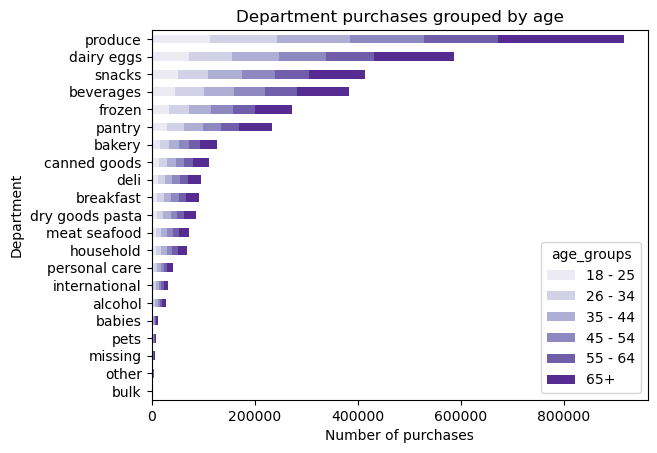

In [391]:
department_age_counts = active_customers_orders.groupby(['department','age_groups']).size().unstack()

count = department_age_counts.sum(axis=1)
data_sorted = department_age_counts.loc[count.sort_values(ascending=True).index]

departments_age_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Purples',6))
plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Department purchases grouped by age')

In [392]:
#exporting into a saved file
departments_age_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments_age_bar.png'), dpi = 300, bbox_inches = 'tight')

Let's look at age from where the income median changes with our age_profile variable

In [393]:
active_customers_orders['age_profile'].value_counts()

45+        2085042
18 - 44    1517139
Name: age_profile, dtype: int64

Text(0.5, 1.0, 'Department purchases grouped by age profile')

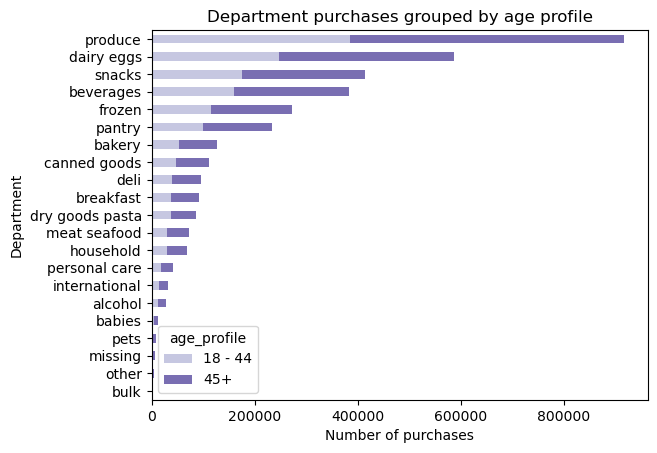

In [394]:
department_age_profile_counts = active_customers_orders.groupby(['department','age_profile']).size().unstack()

count = department_age_profile_counts.sum(axis=1)
data_sorted = department_age_profile_counts.loc[count.sort_values(ascending=True).index]

departments_age_profile_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Purples',2))
plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Department purchases grouped by age profile')


In [395]:
#exporting into a saved file
departments_age_profile_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments by age profile 45+.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price group purchases by age profile')

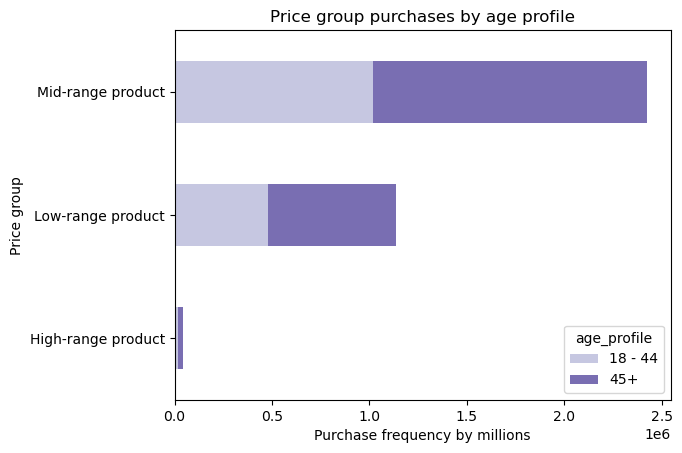

In [466]:
age_price_counts = active_customers_orders.groupby(['price_category', 'age_profile']).size().unstack()

count = age_price_counts.sum(axis=1)
data_sorted = age_price_counts.loc[count.sort_values(ascending=True).index]

age_price_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Purples',2))
plt.xlabel('Purchase frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Price group')
plt.title('Price group purchases by age profile')

In [473]:
#exporting into a saved file
age_price_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'price group by age profile.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency status by age profile')

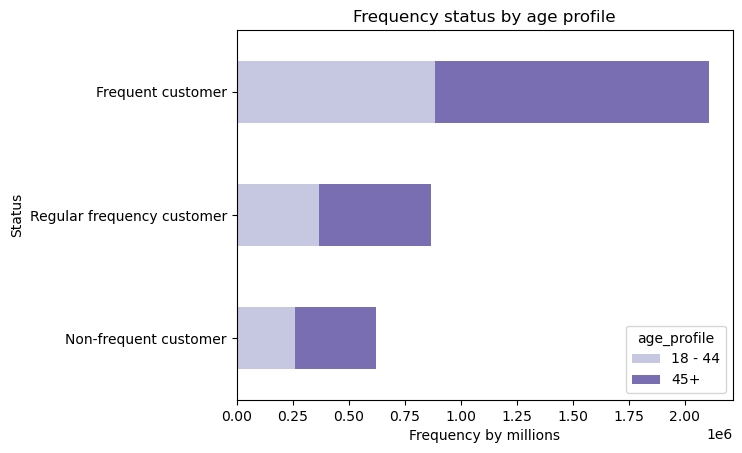

In [462]:
frequency_age_counts = active_customers_orders.groupby(['frequency_status', 'age_profile']).size().unstack()

count = frequency_age_counts.sum(axis=1)
data_sorted = frequency_age_counts.loc[count.sort_values(ascending=True).index]

frequency_age_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Purples',2))
plt.xlabel('Frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Status')
plt.title('Frequency status by age profile')

In [463]:
#exporting into a saved file
frequency_age_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'frequency by age profile.png'), dpi = 300, bbox_inches = 'tight')

In [396]:
#keep this handy for other charts!
region_age=pd.crosstab(active_customers_orders['Region'],active_customers_orders['age_groups'],dropna=False)

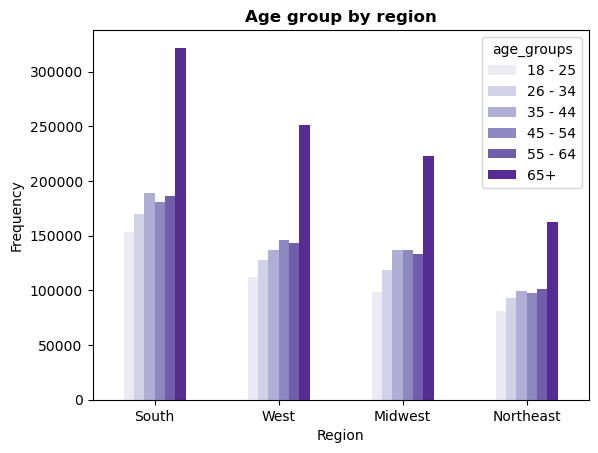

In [397]:
# create a bar chart between age and region
#keep this handy for other charts!
count = region_age.sum(axis=1)

data_sorted = region_age.loc[count.sort_values(ascending=False).index]

regions_age=data_sorted.plot.bar(color=sns.color_palette('Purples',6))

plt.title('Age group by region',fontweight='bold')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Frequency')
plt.show()

In [398]:
#exporting into a saved file
regions_age.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'region by age group.png'), dpi = 300, bbox_inches = 'tight')

# Customer profile: Dependents

Text(0.5, 1.0, 'Department purchases grouped by number of dependents')

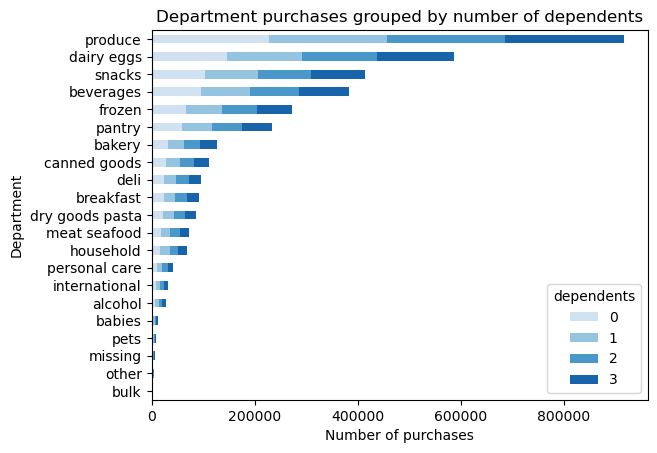

In [399]:
department_dependents_counts = active_customers_orders.groupby(['department','dependents']).size().unstack()

count = department_dependents_counts.sum(axis=1)
data_sorted = department_dependents_counts.loc[count.sort_values(ascending=True).index]

departments_dependents_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Blues',4))
plt.xlabel('Number of purchases')
plt.ylabel('Department')
plt.title('Department purchases grouped by number of dependents')

In [400]:
#exporting into a saved file
departments_dependents_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments by dependent count.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Department purchases grouped by dependent status')

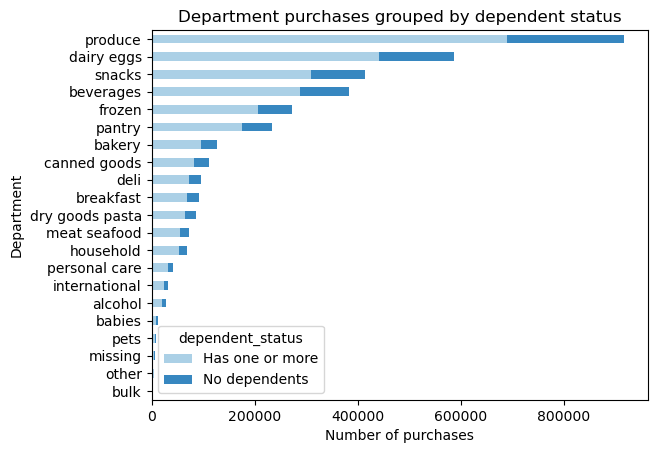

In [401]:
department_dependent_status_counts = active_customers_orders.groupby(['department','dependent_status']).size().unstack()

count = department_dependent_status_counts.sum(axis=1)
data_sorted = department_dependent_status_counts.loc[count.sort_values(ascending=True).index]

departments_dependent_status_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Blues',2))
plt.xlabel('Number of purchases')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Department')
plt.title('Department purchases grouped by dependent status')

In [402]:
#exporting into a saved file
departments_dependent_status_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments by dependent status.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency status by dependent status')

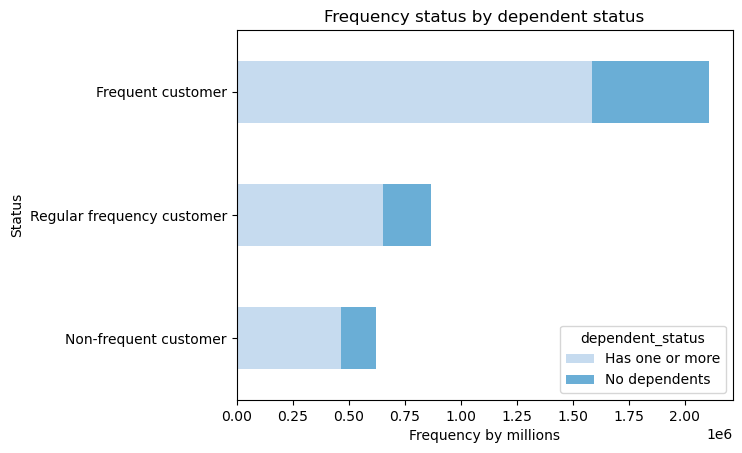

In [449]:
department_frequency_counts = active_customers_orders.groupby(['frequency_status','dependent_status']).size().unstack()

count = department_frequency_counts.sum(axis=1)
data_sorted = department_frequency_counts.loc[count.sort_values(ascending=True).index]

dependent_frequency = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Blues',3))
plt.xlabel('Frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Status')
plt.title('Frequency status by dependent status')

In [450]:
#exporting into a saved file
dependent_frequency.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'frequency status by dependent status.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price group purchases by dependent status')

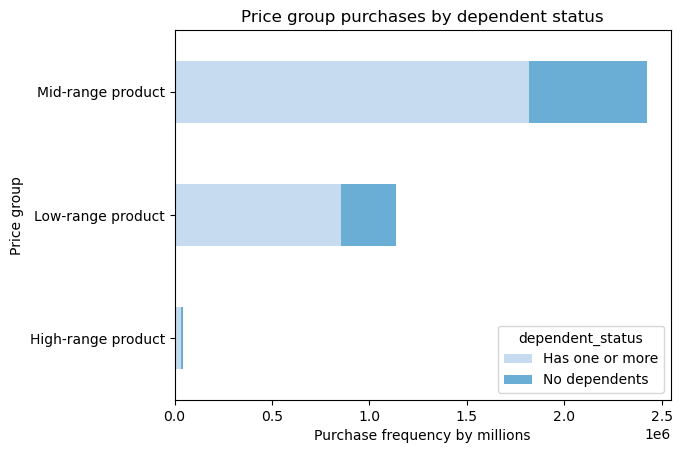

In [451]:
dependent_price_counts = active_customers_orders.groupby(['price_category', 'dependent_status']).size().unstack()

count = dependent_price_counts.sum(axis=1)
data_sorted = dependent_price_counts.loc[count.sort_values(ascending=True).index]

price_dependents = data_sorted.plot.barh(stacked=True, color=sns.color_palette('Blues',3))
plt.xlabel('Purchase frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Price group')
plt.title('Price group purchases by dependent status')

In [454]:
#exporting into a saved file
price_dependents.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'price groups by dependent status.png'), dpi = 300, bbox_inches = 'tight')

In [452]:
#keep this handy for other charts!
region_dependent=pd.crosstab(active_customers_orders['Region'],active_customers_orders['dependent_status'],dropna=False)

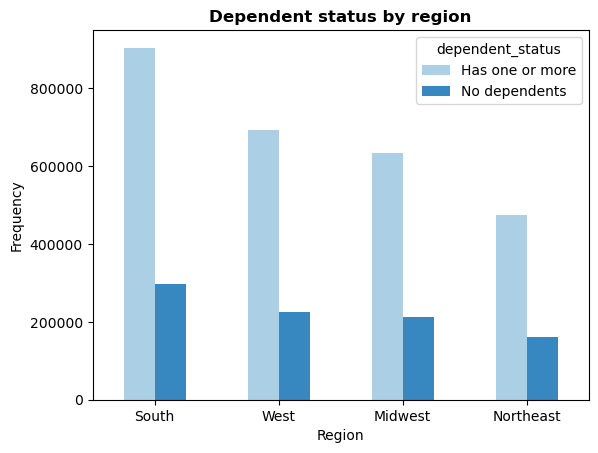

In [404]:
# create a bar chart between age and region
count = region_dependent.sum(axis=1)
data_sorted = region_dependent.loc[count.sort_values(ascending=False).index]

regions_dependent_status=data_sorted.plot.bar(color=sns.color_palette('Blues',2))
plt.title('Dependent status by region',fontweight='bold')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Frequency')
plt.show()

In [405]:
#exporting into a saved file
regions_dependent_status.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'region by dependent status.png'), dpi = 300, bbox_inches = 'tight')

### Otherwise, let's put in some loose ends at the end of the notebook here.

Text(0.5, 1.0, 'Department purchases grouped by region')

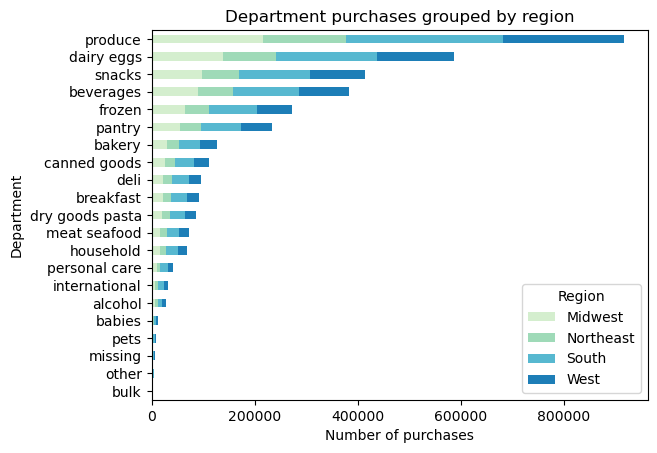

In [406]:
#department status by region
department_region = active_customers_orders.groupby(['department','Region']).size().unstack()

count = department_region.sum(axis=1)
data_sorted = department_region.loc[count.sort_values(ascending=True).index]

departments_region_bar = data_sorted.plot.barh(stacked=True, color=sns.color_palette('GnBu',4))
plt.xlabel('Number of purchases')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Department')
plt.title('Department purchases grouped by region')

In [407]:
#exporting into a saved file
departments_region_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'department by region.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price group purchases by region')

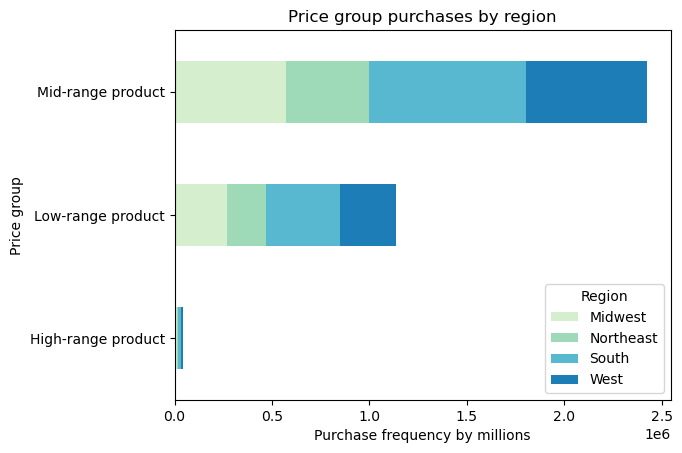

In [483]:
region_price_counts = active_customers_orders.groupby(['price_category', 'Region']).size().unstack()

count = region_price_counts.sum(axis=1)
data_sorted = region_price_counts.loc[count.sort_values(ascending=True).index]

price_region = data_sorted.plot.barh(stacked=True, color=sns.color_palette('GnBu',4))
plt.xlabel('Purchase frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Price group')
plt.title('Price group purchases by region')

In [486]:
#exporting into a saved file
price_region.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'price group by region.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency status by region')

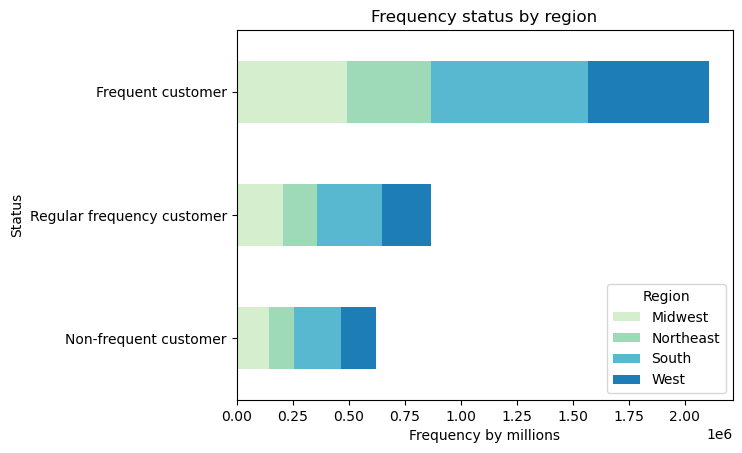

In [485]:
region_frequency_counts = active_customers_orders.groupby(['frequency_status','Region']).size().unstack()

count = region_frequency_counts.sum(axis=1)
data_sorted = region_frequency_counts.loc[count.sort_values(ascending=True).index]

region_frequency = data_sorted.plot.barh(stacked=True, color=sns.color_palette('GnBu',4))
plt.xlabel('Frequency by millions')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Status')
plt.title('Frequency status by region')

In [487]:
#exporting into a saved file
region_frequency.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'frequency status by region.png'), dpi = 300, bbox_inches = 'tight')

In [408]:
active_customers_orders['price_category'].value_counts(dropna = False)

Mid-range product     2423642
Low-range product     1135465
High-range product      43074
Name: price_category, dtype: int64

Text(0.5, 1.0, 'Frequency of price categories')

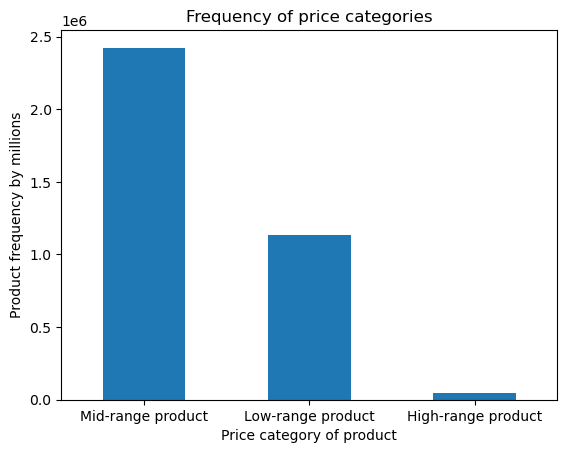

In [409]:
#let's make the bar graph for key question three
#price range groupings
price_category_bar = active_customers_orders['price_category'].value_counts().plot.bar() #(color = ['#006400', '#556B2F',  '#2E8B57', '#3CB371', '#66CDAA', '#20B2AA', '#90EE90'])
#days_bar.set_xticklabels(['Sunday', 'Saturday', 'Thursday', 'Tuesday', 'Monday', 'Friday', 'Wednesday'])
#for i, v in enumerate(customers_orders['orders_day_of_week'].value_counts()):
   # plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Price category of product')
plt.ylabel('Product frequency by millions')
plt.title('Frequency of price categories')

In [410]:
#exporting into a saved file
price_category_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'price_category_bar.png'))

Are certain types of products more important than the other?

In [411]:
active_customers_orders['department_id'].value_counts(dropna = False)

4     916527
16    587456
19    414007
7     383398
1     273466
13    233553
3     127184
15    110719
20     96674
14     91971
9      87004
12     72321
17     69729
11     41677
6      32649
5      28245
18     12370
8       8270
21      6434
2       5568
10      2959
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Frequency of purchases of products by department')

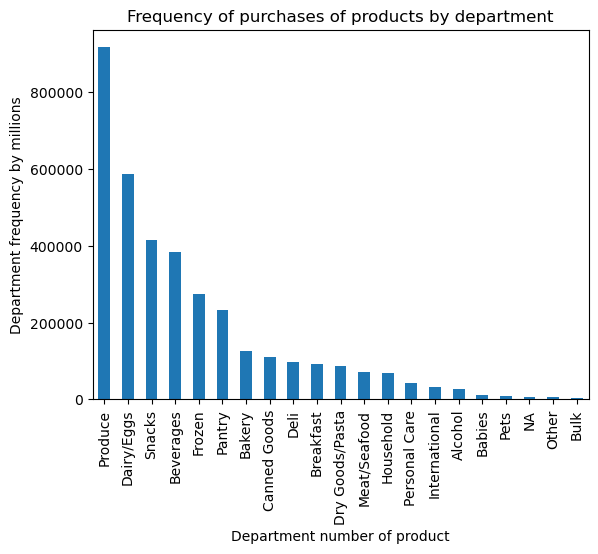

In [412]:
#departments by order frequency
departments_bar = active_customers_orders['department_id'].value_counts().plot.bar()
plt.xlabel('Department number of product')
departments_bar.set_xticklabels(['Produce', 'Dairy/Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Breakfast', 'Dry Goods/Pasta', 'Meat/Seafood', 'Household', 'Personal Care', 'International', 'Alcohol', 'Babies', 'Pets', 'NA', 'Other', 'Bulk'])
plt.ylabel('Department frequency by millions')
plt.title('Frequency of purchases of products by department')

In [413]:
#exporting into a saved file
departments_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments_bar.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency of purchases by region')

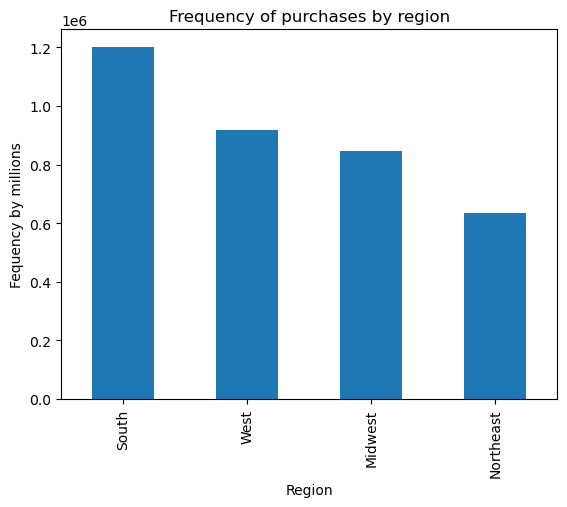

In [414]:
#regions by order frequency
regions_bar = active_customers_orders['Region'].value_counts().plot.bar()
plt.xlabel('Region')
#departments_bar.set_xticklabels(['Produce', 'Dairy/Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Breakfast', 'Dry Goods/Pasta', 'Meat/Seafood', 'Household', 'Personal Care', 'International', 'Alcohol', 'Babies', 'Pets', 'NA', 'Other', 'Bulk'])
plt.ylabel('Fequency by millions')
plt.title('Frequency of purchases by region')

Difference in ordering habits based on customer's loyalty status

In [415]:
#exporting into a saved file
regions_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'regions_bar.png'), dpi = 300, bbox_inches = 'tight')

## Loyalty status

In [416]:
active_customers_orders.dtypes

user_id                               int8
first_name                          object
surname                             object
gender                              object
state                               object
age                                   int8
date_joined                         object
dependents                            int8
fam_status                          object
income                               int32
order_id                             int32
order_number                          int8
orders_day_of_week                    int8
order_time_of_day                     int8
days_since_prior_order                int8
new_customer                         int32
product_id                           int32
add_to_cart_order                    int32
reordered                            int32
_merge                            category
product_name                        object
aisle_id                              int8
department_id                         int8
prices     

In [417]:
active_customers_orders['price_category'].value_counts(dropna = False)

Mid-range product     2423642
Low-range product     1135465
High-range product      43074
Name: price_category, dtype: int64

Text(0.5, 1.0, 'Price category purchases grouped by loyalty status')

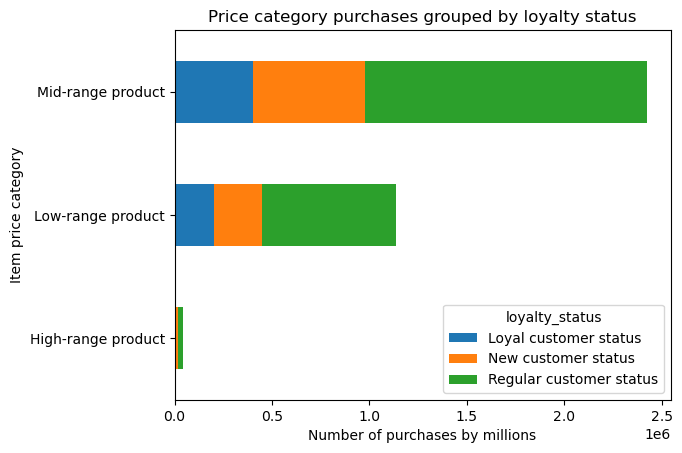

In [418]:
loyalty_counts = active_customers_orders.groupby(['price_category','loyalty_status']).size().unstack()
loyalty_status_bar = loyalty_counts.plot.barh(stacked=True)
plt.xlabel('Number of purchases by millions')
plt.ylabel('Item price category')
plt.title('Price category purchases grouped by loyalty status')

In [419]:
#exporting into a saved file
loyalty_status_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'loyalty staus by price category.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price category purchases grouped by loyalty status')

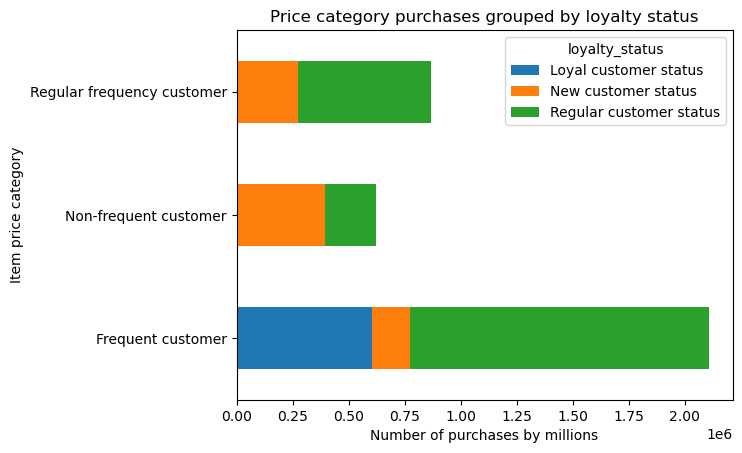

In [420]:
loyalty_counts = active_customers_orders.groupby(['frequency_status','loyalty_status']).size().unstack()
loyalty_frequency_bar = loyalty_counts.plot.barh(stacked=True)
plt.xlabel('Number of purchases by millions')
plt.ylabel('Item price category')
plt.title('Price category purchases grouped by loyalty status')

In [421]:
#exporting into a saved file
loyalty_frequency_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'loyalty staus by customer frequency.png'), dpi = 300, bbox_inches = 'tight')

Checked the variable, and it seems I set it up with the wrong days. So I'm going to replace the data.

In [422]:
active_customers_orders['orders_day_of_week'].value_counts(dropna = False)

1    690555
0    630971
5    550701
3    495379
2    455147
6    417130
4    362298
Name: orders_day_of_week, dtype: int64

In [423]:
#change column values of busiest_days
result = []

for value in active_customers_orders['orders_day_of_week']:
    if value == 0 or value == 1:
        result.append('Busiest days')
    elif value == 4 or value == 6:
        result.append('Least busy days')
    else:
        result.append('Regularly busy days')

In [424]:
active_customers_orders['busiest_days'] = result
active_customers_orders['busiest_days'].value_counts(dropna = False)

Regularly busy days    1501227
Busiest days           1321526
Least busy days         779428
Name: busiest_days, dtype: int64

Text(0.5, 1.0, 'Busiest days purchases grouped by loyalty status')

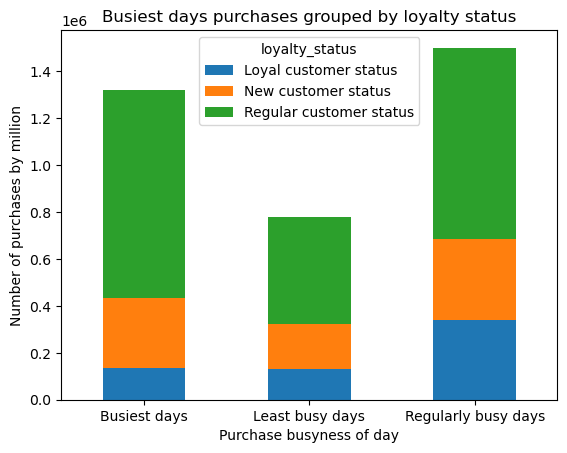

In [425]:
loyalty_day_counts = active_customers_orders.groupby(['busiest_days','loyalty_status']).size().unstack()
loyalty_day_bar = loyalty_day_counts.plot.bar(stacked=True)
plt.xlabel('Purchase busyness of day')
plt.xticks(rotation = 0)
plt.ylabel('Number of purchases by million')
plt.title('Busiest days purchases grouped by loyalty status')

In [426]:
#exporting into a saved file
loyalty_day_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'loyalty staus by busiest days.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Price category purchases grouped by loyalty status')

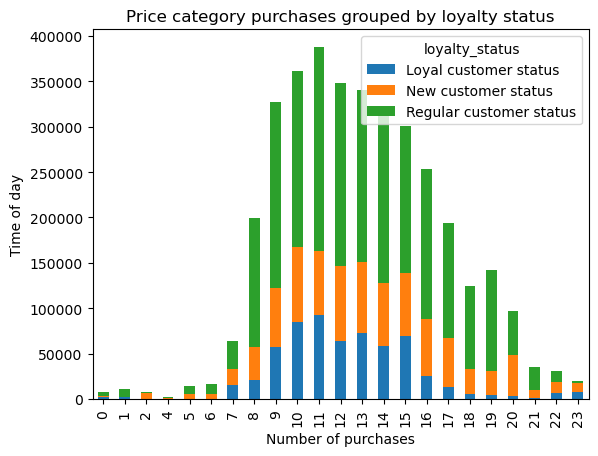

In [427]:
loyalty_counts = active_customers_orders.groupby(['order_time_of_day','loyalty_status']).size().unstack()
loyalty_frequency_bar = loyalty_counts.plot.bar(stacked=True)
plt.xlabel('Number of purchases')
plt.ylabel('Time of day')
plt.title('Price category purchases grouped by loyalty status')

In [428]:
#exporting into a saved file
loyalty_frequency_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'loyalty staus by busiest time of day.png'), dpi = 300, bbox_inches = 'tight')

In [430]:
grouped_data = active_customers_orders.groupby(['department', 'loyalty_status']).size().unstack()

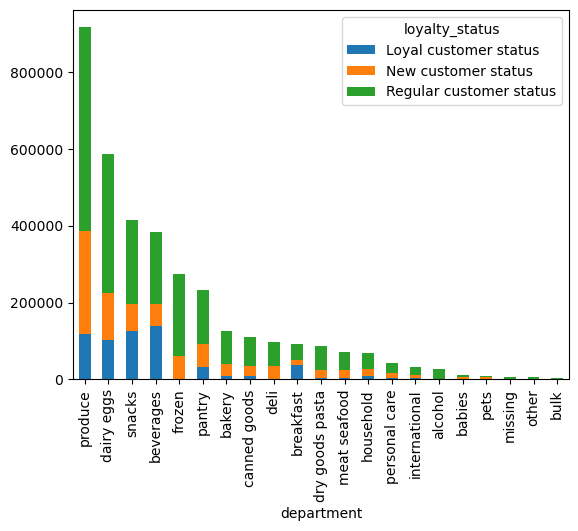

In [433]:
count = grouped_data.sum(axis=1)
data_sorted = grouped_data.loc[count.sort_values(ascending=False).index]
departments_stacked_bar = data_sorted.plot.bar(stacked=True)

In [434]:
#exporting into a saved file
departments_stacked_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'departments by loyalty status.png'), dpi = 300, bbox_inches = 'tight')

In [435]:
active_customers_orders.to_pickle(os.path.join(mainPath, '02 Datasets','Clean Data', 'active_customers_orders_final_cleaned.pkl'))